## How to measure your skill as a portfolio manager with the information ratio

In this issue, I’m going to show you how to measure your skill as a portfolio manager with the information ratio.

Active money managers are paid based on their performance against a benchmark like the S&P 500 or Nasdaq. The information ratio is a single number that measures their performance against that benchmark. The higher the information ratio, the better the skill.

You can use the information ratio the same way the professionals do.

Here’s why you might want to.

## You may be better off investing in the benchmark

Actively managing a portfolio takes time and costs money. Investing in an ETF tracking a benchmark takes no time and costs very little money. The information ratio can tell you if you’re doing better than the benchmark.

By the end of this issue, you’ll know:

How to get stock price data
How to construct a simple portfolio
How to compute the information ratio
How to compare your portfolio to the benchmark

In [2]:
# Get the data
import pandas as pd
import yfinance as yf
# With yfinance, you can download prices for more than one stock at a time. Grab data for QQQ, AAPL, and AMZN.

data = yf.download(["QQQ", "AAPL", "AMZN"], start="2020-01-01", end="2022-07-31")
closes = data['Adj Close']
benchmark_returns = closes.QQQ.pct_change()

[*********************100%***********************]  3 of 3 completed


<AxesSubplot:xlabel='Date'>

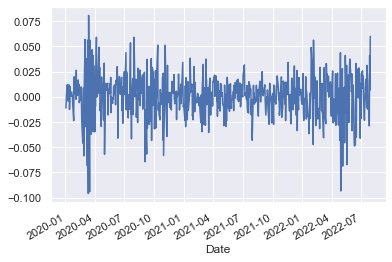

In [5]:
# construct a simple portfolio of equal shares
aapl_position = closes.AAPL * 50
amzn_position = closes.AMZN * 50
# Next figure out the portfolio returns and plot them against the benchmark returns.

# compute the portfolio value over time
portfolio_value = aapl_position + amzn_position

# compute the portfolio daily pnl
portfolio_pnl = (
    (aapl_position - aapl_position.shift())
    + (amzn_position - amzn_position.shift())
)

# compute the portfolio daily return
portfolio_returns = (portfolio_pnl / portfolio_value)
portfolio_returns.name = "Port"
# Plot the portfolio returns
portfolio_returns.plot()

To figure out portfolio returns, first, figure out the daily portfolio value. Then, how much money you made or lost. By dividing the daily profit or loss by the daily portfolio value, you get that day’s return.

The last line adds a name to the series for the plot label.

<AxesSubplot:xlabel='Date'>

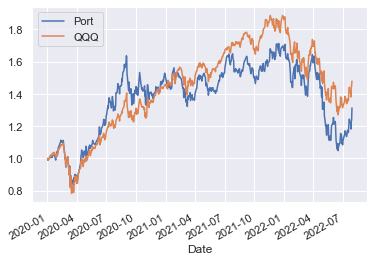

In [6]:
# prepare dataframes for plotting
portfolio_cumulative_returns = (portfolio_returns.fillna(0.0) + 1).cumprod()
benchmark_cumulative_returns = (benchmark_returns.fillna(0.0) + 1).cumprod()

# plot the cumulative portfolio v. benchmark returns
pd.concat(
    [
        portfolio_cumulative_returns,
        benchmark_cumulative_returns
    ],
    axis=1
).plot()

## Build a function for the information ratio

The information ratio is the average active return divided by the tracking error. Active return is the difference between portfolio and benchmark returns. Tracking error is the standard deviation of the active return.

In [7]:
def information_ratio(portfolio_returns, benchmark_returns):
    """
    Determines the information ratio of a strategy.

    Parameters
    ----------
    portfolio_returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    benchmark_returns : int, float
        Daily returns of the benchmark or factor, noncumulative.

    Returns
    -------
    information_ratio : float

    Note
    -----
    See https://en.wikipedia.org/wiki/Information_ratio for more details.
    """
    active_return = portfolio_returns - benchmark_returns
    tracking_error = active_return.std()

    return active_return.mean() / tracking_error

# First, subtract the benchmark returns from the portfolio returns. This gives you the active return. Then find the standard deviation. Finally, divide the mean active return by the tracking error to get the information ratio.

In [8]:
# Compare portfolio returns to the benchmark

# Pass in the portfolio and benchmark returns to the function to gauge your skill as an active manager.

information_ratio(portfolio_returns, benchmark_returns)

-0.014621479005141266